# PA2 NETWORK SECURITY

## Name:- Abhishek Gupta 
## Roll no.:- 19085005
## Branch :- EEE(B.Tech)


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# for Hamming distance between two strings
def hammingDist(str1, str2):
    i = 0
    count = 0
 
    while(i < len(str1)):
        if(str1[i] != str2[i]):
            count += 1
        i += 1
    return count

# for Hexadecimal to binary conversion
def hex2bin(s):
	vis = {'0' : "0000",
		'1' : "0001",
		'2' : "0010",
		'3' : "0011",
		'4' : "0100",
		'5' : "0101",
		'6' : "0110",
		'7' : "0111",
		'8' : "1000",
		'9' : "1001",
		'A' : "1010",
		'B' : "1011",
		'C' : "1100",
		'D' : "1101",
		'E' : "1110",
		'F' : "1111" }
	bin = ""
	for i in range(len(s)):
		bin = bin + vis[s[i]]
	return bin
	
# for Binary to hexadecimal conversion
def bin2hex(s):
	mp = {"0000" : '0',
		"0001" : '1',
		"0010" : '2',
		"0011" : '3',
		"0100" : '4',
		"0101" : '5',
		"0110" : '6',
		"0111" : '7',
		"1000" : '8',
		"1001" : '9',
		"1010" : 'A',
		"1011" : 'B',
		"1100" : 'C',
		"1101" : 'D',
		"1110" : 'E',
		"1111" : 'F' }
	hex = ""
	for i in range(0,len(s),4):
		ch = ""
		ch = ch + s[i]
		ch = ch + s[i + 1]
		ch = ch + s[i + 2]
		ch = ch + s[i + 3]
		hex = hex + mp[ch]
		
	return hex

# for Binary to decimal conversion
def bin2dec(binary):
	
	binary1 = binary
	decimal, i, n = 0, 0, 0
	while(binary != 0):
		dec = binary % 10
		decimal = decimal + dec * pow(2, i)
		binary = binary//10
		i += 1
	return decimal

# for Decimal to binary conversion
def dec2bin(num):
	res = bin(num).replace("0b", "")
	if(len(res)%4 != 0):
		div = len(res) / 4
		div = int(div)
		counter =(4 * (div + 1)) - len(res)
		for i in range(0, counter):
			res = '0' + res
	return res

# Permute function to rearrange the bits
def permute(k, arr, n):
	permutation = ""
	for i in range(0, n):
		permutation = permutation + k[arr[i] - 1]
	return permutation

# shifting the bits towards left by nth shifts
def shift_left(k, nth_shifts):
	s = ""
	for i in range(nth_shifts):
		for j in range(1,len(k)):
			s = s + k[j]
		s = s + k[0]
		k = s
		s = ""
	return k

# calculating xor of two strings of binary number a and b
def xor(a, b):
	ans = ""
	for i in range(len(a)):
		if a[i] == b[i]:
			ans = ans + "0"
		else:
			ans = ans + "1"
	return ans

# Table of Position of 64 bits at initial level: Initial Permutation Table
initial_perm = [58, 50, 42, 34, 26, 18, 10, 2,
				60, 52, 44, 36, 28, 20, 12, 4,
				62, 54, 46, 38, 30, 22, 14, 6,
				64, 56, 48, 40, 32, 24, 16, 8,
				57, 49, 41, 33, 25, 17, 9, 1,
				59, 51, 43, 35, 27, 19, 11, 3,
				61, 53, 45, 37, 29, 21, 13, 5,
				63, 55, 47, 39, 31, 23, 15, 7]

# Expansion D-box Table
exp_d = [32, 1 , 2 , 3 , 4 , 5 , 4 , 5,
		6 , 7 , 8 , 9 , 8 , 9 , 10, 11,
		12, 13, 12, 13, 14, 15, 16, 17,
		16, 17, 18, 19, 20, 21, 20, 21,
		22, 23, 24, 25, 24, 25, 26, 27,
		28, 29, 28, 29, 30, 31, 32, 1 ]

# Straight Permutation Table
per = [ 16, 7, 20, 21,
		29, 12, 28, 17,
		1, 15, 23, 26,
		5, 18, 31, 10,
		2, 8, 24, 14,
		32, 27, 3, 9,
		19, 13, 30, 6,
		22, 11, 4, 25 ]

# S-box Table
sbox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
		[ 0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
		[ 4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
		[15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13 ]],
			
		[[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
			[3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
			[0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
		[13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9 ]],

		[ [10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
		[13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
		[13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
			[1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12 ]],
	
		[ [7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
		[13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
		[10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
			[3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14] ],
		
		[ [2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
		[14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
			[4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
		[11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3 ]],
	
		[ [12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
		[10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
			[9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
			[4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13] ],
		
		[ [4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
		[13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
			[1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
			[6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12] ],
		
		[ [13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
			[1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
			[7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
			[2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11] ] ]

# Final Permutation Table
final_perm = [ 40, 8, 48, 16, 56, 24, 64, 32,
			39, 7, 47, 15, 55, 23, 63, 31,
			38, 6, 46, 14, 54, 22, 62, 30,
			37, 5, 45, 13, 53, 21, 61, 29,
			36, 4, 44, 12, 52, 20, 60, 28,
			35, 3, 43, 11, 51, 19, 59, 27,
			34, 2, 42, 10, 50, 18, 58, 26,
			33, 1, 41, 9, 49, 17, 57, 25 ]

def encrypt(pt, rkb, rk):
	
	# Initial Permutation
	pt = permute(pt, initial_perm, 64)
# 	print("After initial permutation", bin2hex(pt))
	print("Enciphering....")
	roundCyphertexts = []
	# Splitting
	left = pt[0:32]
	right = pt[32:64]
	for i in range(0, 16):
		# Expansion D-box: Expanding the 32 bits data into 48 bits
		right_expanded = permute(right, exp_d, 48)
		
		# XOR RoundKey[i] and right_expanded
		xor_x = xor(right_expanded, rkb[i])

		# S-boxex: substituting the value from s-box table by calculating row and column
		sbox_str = ""
		for j in range(0, 8):
			row = bin2dec(int(xor_x[j * 6] + xor_x[j * 6 + 5]))
			col = bin2dec(int(xor_x[j * 6 + 1] + xor_x[j * 6 + 2] + xor_x[j * 6 + 3] + xor_x[j * 6 + 4]))
			val = sbox[j][row][col]
			sbox_str = sbox_str + dec2bin(val)
			
		# Straight D-box: After substituting rearranging the bits
		sbox_str = permute(sbox_str, per, 32)
		
		# XOR left and sbox_str
		result = xor(left, sbox_str)
		left = result
		
		# Swapper
		if(i != 15):
			left, right = right, left
		roundCyphertexts.append(left+right)
# 		print("Round ", i + 1, " ", bin2hex(left), " ", bin2hex(right), " ", rk[i])
	
	# Combination
	combine = left + right
	print("Your plaintext has been enciphered!")
	# Final permutation: final rearranging of bits to get cipher text
	cipher_text = permute(combine, final_perm, 64)
	return roundCyphertexts

# pt = "127456ABCD132536"
original_plain_text = "0001001001110100010101101010101111001101000100110010010100110110"
# key = "AABB09182735CCDD"
key = "1010101010111011000010010001100000100111001101011100110011011101"
original_key = key
# --parity bit drop table
keyp = [57, 49, 41, 33, 25, 17, 9,
		1, 58, 50, 42, 34, 26, 18,
		10, 2, 59, 51, 43, 35, 27,
		19, 11, 3, 60, 52, 44, 36,
		63, 55, 47, 39, 31, 23, 15,
		7, 62, 54, 46, 38, 30, 22,
		14, 6, 61, 53, 45, 37, 29,
		21, 13, 5, 28, 20, 12, 4 ]

# getting 56 bit key from 64 bit using the parity bits
key = permute(key, keyp, 56)

# Number of bit shifts
shift_table = [1, 1, 2, 2,
				2, 2, 2, 2,
				1, 2, 2, 2,
				2, 2, 2, 1 ]

# Key- Compression Table : Compression of key from 56 bits to 48 bits
key_comp = [14, 17, 11, 24, 1, 5,
			3, 28, 15, 6, 21, 10,
			23, 19, 12, 4, 26, 8,
			16, 7, 27, 20, 13, 2,
			41, 52, 31, 37, 47, 55,
			30, 40, 51, 45, 33, 48,
			44, 49, 39, 56, 34, 53,
			46, 42, 50, 36, 29, 32 ]

# Splitting
left = key[0:28] # rkb for RoundKeys in binary
right = key[28:56] # rk for RoundKeys in hexadecimal

rkb = []
rk = []
for i in range(0, 16):
	# Shifting the bits by nth shifts by checking from shift table
	left = shift_left(left, shift_table[i])
	right = shift_left(right, shift_table[i])
	
	# Combination of left and right string
	combine_str = left + right
	
	# Compression of key from 56 to 48 bits
	round_key = permute(combine_str, key_comp, 48)

	rkb.append(round_key)
	rk.append(bin2hex(round_key))

print("Initial Encryption")
initial_cipher_texts = encrypt(original_plain_text, rkb, rk)
# print("Initial Cipher Text : ",initial_cipher_texts)

Initial Encryption
Enciphering....
Your plaintext has been enciphered!


In [3]:
# I have created a new plaintext with a Hamming distance of 1 from the original_plain_text
PlainText1 = "0101001001110100010101101010101111001101000100110010010100110110"
              

print("Encryption with Plaintext of Hamming distance: ", hammingDist(original_plain_text, PlainText1))

# Now we are getting a list of 16 round cyphertexts for this new plaintext
PlainText1_cipher_texts = encrypt(PlainText1, rkb, rk)

Encryption with Plaintext of Hamming distance:  1
Enciphering....
Your plaintext has been enciphered!


In [4]:
# I have created a new plaintext with a Hamming distance of 2 from the original_plain_text
PlainText2 = "0001001101110100010001101010101111001101000100110010010100110110"
              

print("Encryption with Plaintext of Hamming distance: ", hammingDist(original_plain_text, PlainText2))

# Now we are getting a list of 16 round cyphertexts for this new plaintext
PlainText2_cipher_texts = encrypt(PlainText2, rkb, rk)

Encryption with Plaintext of Hamming distance:  2
Enciphering....
Your plaintext has been enciphered!


Encryption with Plaintext of Hamming distance:  2
Enciphering....
Your plaintext has been enciphered!

In [5]:
# I have created a new plaintext with a Hamming distance of 3 from the original_plain_text
PlainText3 = "1001001001110100010101101011101111001101010100110010010100110110"

print("Encryption with Plaintext of Hamming distance: ", hammingDist(original_plain_text, PlainText3))

# Now we are getting a list of 16 round cyphertexts for this new plaintext
PlainText3_cipher_texts = encrypt(PlainText3, rkb, rk)

Encryption with Plaintext of Hamming distance:  3
Enciphering....
Your plaintext has been enciphered!


In [6]:
# I have created a new plaintext with a Hamming distance of 4 from the original_plain_text
PlainText4 = "0000011001110101010101101010101111001101000100110010010110110110"

print("Encryption with Plaintext of Hamming distance: ", hammingDist(original_plain_text, PlainText4))

# Now we are getting a list of 16 round cyphertexts for this new plaintext
PlainText4_cipher_texts = encrypt(PlainText4, rkb, rk)

Encryption with Plaintext of Hamming distance:  4
Enciphering....
Your plaintext has been enciphered!


In [7]:
# I have created a new plaintext with a Hamming distance of 5 from the original_plain_text
PlainText5 = "0101000001110100110101101010101101001101000100110110010100110110"

print("Encryption with Plaintext of Hamming distance: ", hammingDist(original_plain_text, PlainText5))

# Now we are getting a list of 16 round cyphertexts for this new plaintext
PlainText5_cipher_texts = encrypt(PlainText5, rkb, rk)

Encryption with Plaintext of Hamming distance:  5
Enciphering....
Your plaintext has been enciphered!


In [8]:
# Now we will use the original_plain_text, but use keys with different hamming_distances
# For this, I have created a utility function which will take the 64-bit key and return the list of cypher_texts

def get_cipher_texts_for_given_key(key):
    keyp = [57, 49, 41, 33, 25, 17, 9,
            1, 58, 50, 42, 34, 26, 18,
            10, 2, 59, 51, 43, 35, 27,
            19, 11, 3, 60, 52, 44, 36,
            63, 55, 47, 39, 31, 23, 15,
            7, 62, 54, 46, 38, 30, 22,
            14, 6, 61, 53, 45, 37, 29,
            21, 13, 5, 28, 20, 12, 4 ]

    # getting 56 bit key from 64 bit using the parity bits
    key = permute(key, keyp, 56)

    # Number of bit shifts
    shift_table = [1, 1, 2, 2,
                    2, 2, 2, 2,
                    1, 2, 2, 2,
                    2, 2, 2, 1 ]

    # Key- Compression Table : Compression of key from 56 bits to 48 bits
    key_comp = [14, 17, 11, 24, 1, 5,
                3, 28, 15, 6, 21, 10,
                23, 19, 12, 4, 26, 8,
                16, 7, 27, 20, 13, 2,
                41, 52, 31, 37, 47, 55,
                30, 40, 51, 45, 33, 48,
                44, 49, 39, 56, 34, 53,
                46, 42, 50, 36, 29, 32 ]

    # Splitting
    left = key[0:28] # rkb for RoundKeys in binary
    right = key[28:56] # rk for RoundKeys in hexadecimal

    rkb = []
    rk = []
    for i in range(0, 16):
        # Shifting the bits by nth shifts by checking from shift table
        left = shift_left(left, shift_table[i])
        right = shift_left(right, shift_table[i])

        # Combination of left and right string
        combine_str = left + right

        # Compression of key from 56 to 48 bits
        round_key = permute(combine_str, key_comp, 48)

        rkb.append(round_key)
        rk.append(bin2hex(round_key))
    
    cipher_texts = encrypt(original_plain_text, rkb, rk)
    
    return cipher_texts

In [9]:
Key1 = "1110101010111011000010010001100000100111001101011100110011011101"
print("Hamming distance of this key from original key: ", hammingDist(Key1, original_key))
key1_cipher_texts = get_cipher_texts_for_given_key(Key1)

Hamming distance of this key from original key:  1
Enciphering....
Your plaintext has been enciphered!


In [10]:
Key2 = "1111101010111011000010010001100000100111001101011100110011011101"
print("Hamming distance of this key from original key: ", hammingDist(Key2, original_key))
key2_cipher_texts = get_cipher_texts_for_given_key(Key2)


Hamming distance of this key from original key:  2
Enciphering....
Your plaintext has been enciphered!


In [11]:
Key3 = "1010111110111011000010010101100000100111101101011100110111011101"
print("Hamming distance of this key from original key: ", hammingDist(Key3, original_key))
key3_cipher_texts = get_cipher_texts_for_given_key(Key3)
Key4 = "1010101010111011000010010001100000100011001101011000110111011111"
print("Hamming distance of this key from original key: ", hammingDist(Key4, original_key))
key4_cipher_texts = get_cipher_texts_for_given_key(Key4)
Key5 = "1111101010111111000010010101100000100011011101011100110010000101"
print("Hamming distance of this key from original key: ", hammingDist(Key5, original_key))
key5_cipher_texts = get_cipher_texts_for_given_key(Key5)

Hamming distance of this key from original key:  5
Enciphering....
Your plaintext has been enciphered!
Hamming distance of this key from original key:  4
Enciphering....
Your plaintext has been enciphered!
Hamming distance of this key from original key:  9
Enciphering....
Your plaintext has been enciphered!


In [12]:
# Now let us calculate the hamming distance for ciphertexts of each round, for a particular hamming dist
# We will create a utility-function for this, which takes in original cipher_texts and ciphertext generated with
# each new plaintext

def getHammingDistanceArray(initial_cipher_texts, new_cipher_texts):
    hammingDistances = []
    for i in range(len(initial_cipher_texts)):
        hammingDistances.append(hammingDist(initial_cipher_texts[i], new_cipher_texts[i]))
    hammingDistances = np.array(hammingDistances)
    
    return hammingDistances
    

In [13]:
# Calculating the hamming distances of Cipertexts for different values of deltaP, keeping the key fixed

delta_C1_for_P1 = getHammingDistanceArray(initial_cipher_texts, PlainText1_cipher_texts)

delta_C2_for_P2 = getHammingDistanceArray(initial_cipher_texts, PlainText2_cipher_texts)

delta_C3_for_P3 = getHammingDistanceArray(initial_cipher_texts, PlainText3_cipher_texts)

delta_C4_for_P4 = getHammingDistanceArray(initial_cipher_texts, PlainText4_cipher_texts)

delta_C5_for_P5 = getHammingDistanceArray(initial_cipher_texts, PlainText5_cipher_texts)

# Calculating the hamming distances of Cipertexts for different values of deltaK, keeping the plaintext fixed

delta_C1_for_K1 = getHammingDistanceArray(initial_cipher_texts, key1_cipher_texts)

delta_C2_for_K2 = getHammingDistanceArray(initial_cipher_texts, key2_cipher_texts)

delta_C3_for_K3 = getHammingDistanceArray(initial_cipher_texts, key3_cipher_texts)

delta_C4_for_K4 = getHammingDistanceArray(initial_cipher_texts, key4_cipher_texts)

delta_C5_for_K5 = getHammingDistanceArray(initial_cipher_texts, key5_cipher_texts)

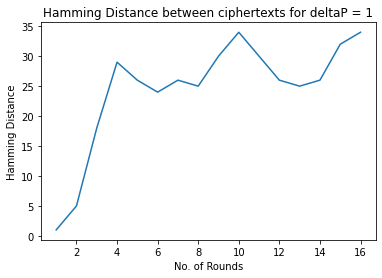

In [14]:
round_no = np.arange(1, 17)

# Plotting for PlainText with Hamming Distance 1

plt.plot(round_no, delta_C1_for_P1) 
plt.xlabel('No. of Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaP = 1')
plt.show()

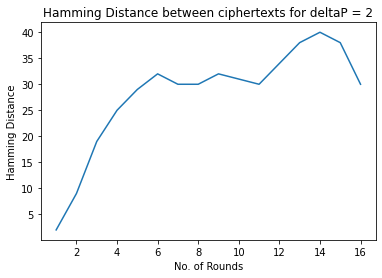

In [15]:
# Plotting for PlainText with Hamming Distance 2

plt.plot(round_no, delta_C2_for_P2) 
plt.xlabel('No. of Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaP = 2')
plt.show()

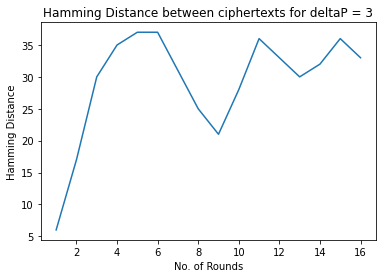

In [16]:
# Plotting for PlainText with Hamming Distance 3

plt.plot(round_no, delta_C3_for_P3) 
plt.xlabel('No. of Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaP = 3')
plt.show()

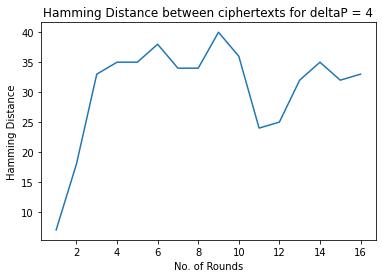

In [17]:
# Plotting for PlainText with Hamming Distance 4

plt.plot(round_no, delta_C4_for_P4) 
plt.xlabel('No. of Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaP = 4')
plt.show()

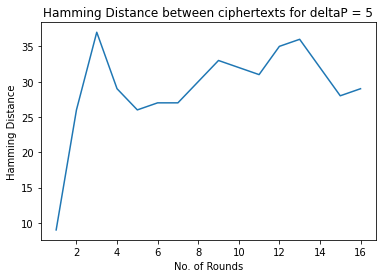

In [18]:
# Plotting for PlainText with Hamming Distance 1

plt.plot(round_no, delta_C5_for_P5) 
plt.xlabel('No. of Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaP = 5')
plt.show()

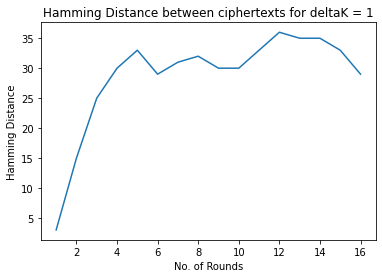

In [19]:
# Plotting for Key with Hamming Distance 1

plt.plot(round_no, delta_C1_for_K1) 
plt.xlabel('No. of Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaK = 1')
plt.show()

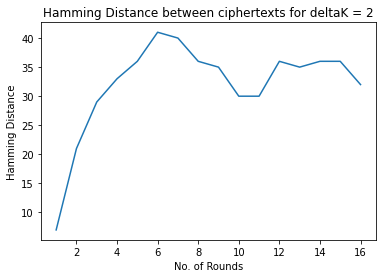

In [20]:
# Plotting for Key with Hamming Distance 2

plt.plot(round_no, delta_C2_for_K2) 
plt.xlabel('No. of Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaK = 2')
plt.show()

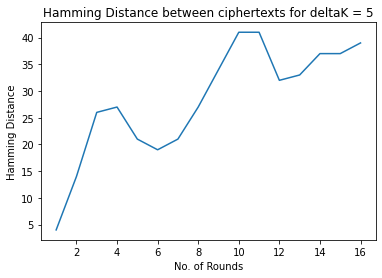

In [21]:
# Plotting for Key with Hamming Distance 3

plt.plot(round_no, delta_C3_for_K3) 
plt.xlabel('No. of Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaK = 5')
plt.show()

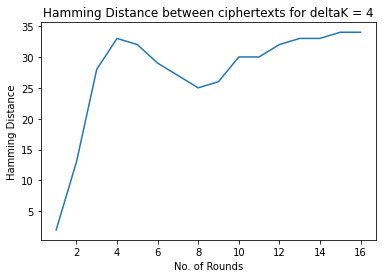

In [22]:
# Plotting for Key with Hamming Distance 4

plt.plot(round_no, delta_C4_for_K4) 
plt.xlabel('No. of Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaK = 4')
plt.show()

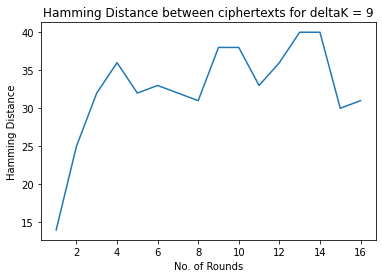

In [23]:
# Plotting for Key with Hamming Distance 5

plt.plot(round_no, delta_C5_for_K5) 
plt.xlabel('No. of Rounds')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance between ciphertexts for deltaK = 9')
plt.show()

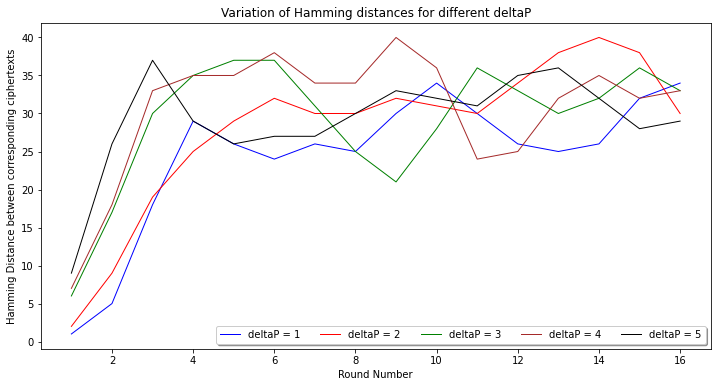

In [24]:
# Now plotting together for different PlainTexts
fig, ax = plt.subplots(figsize=(12,6))

# Use linewidth or lw
ax.set_xlabel('Round Number')
ax.set_ylabel('Hamming Distance between corresponding ciphertexts')
ax.set_title('Variation of Hamming distances for different deltaP')

ax.plot(round_no, delta_C1_for_P1, color="blue", linewidth=1, label="deltaP = 1")
ax.plot(round_no, delta_C2_for_P2, color="red", linewidth=1, label="deltaP = 2")
ax.plot(round_no, delta_C3_for_P3, color="green", linewidth=1, label="deltaP = 3")
ax.plot(round_no, delta_C4_for_P4, color="brown", linewidth=1, label="deltaP = 4")
ax.plot(round_no, delta_C5_for_P5, color="black", linewidth=1, label="deltaP = 5")
ax.legend(ncol=5, fancybox=True, shadow=True)

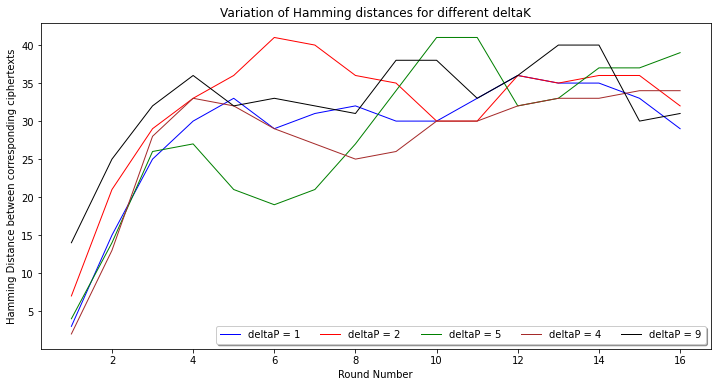

In [25]:
# Now plotting together for different Keys
fig, ax = plt.subplots(figsize=(12,6))

# Use linewidth or lw
ax.set_xlabel('Round Number')
ax.set_ylabel('Hamming Distance between corresponding ciphertexts')
ax.set_title('Variation of Hamming distances for different deltaK')

ax.plot(round_no, delta_C1_for_K1, color="blue", linewidth=1, label="deltaP = 1")
ax.plot(round_no, delta_C2_for_K2, color="red", linewidth=1, label="deltaP = 2")
ax.plot(round_no, delta_C3_for_K3, color="green", linewidth=1, label="deltaP = 5")
ax.plot(round_no, delta_C4_for_K4, color="brown", linewidth=1, label="deltaP = 4")
ax.plot(round_no, delta_C5_for_K5, color="black", linewidth=1, label="deltaP = 9")
ax.legend(ncol=5, fancybox=True, shadow=True)